# Problem Set 0: Images as Functions


## Imports

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

## Question 1 - Input images

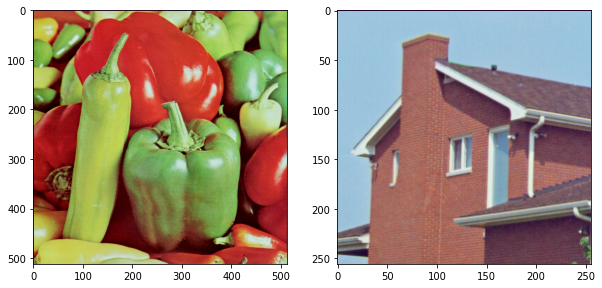

In [37]:
image_1 = cv.imread("output/ps0-1-a-1.png", cv.IMREAD_COLOR)
image_1 = cv.cvtColor(image_1, cv.COLOR_BGR2RGB)

image_2 = cv.imread("output/ps0-1-a-2.png", cv.IMREAD_COLOR)
image_2 = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(ncols=2, figsize=(10, 10), facecolor="white")
axs[0].imshow(image_1)
axs[1].imshow(image_2)
plt.show()

## Question 2 - Color planes
### a) Swap the red and blue pixels of image 1 ps0-2-a-1.png
Output: ps0-2-a-1.png

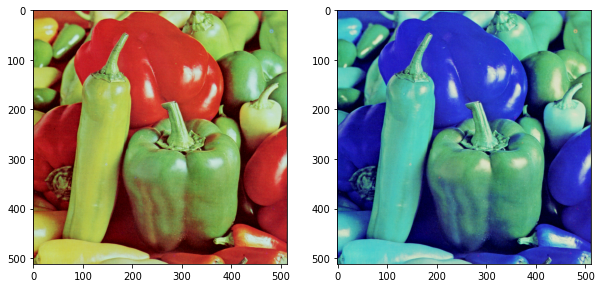

True

In [38]:
red_image_1, green_image_1, blue_image_1 = cv.split(image_1)
swapped_image_1 = cv.merge((blue_image_1, green_image_1, red_image_1))

fig, axs = plt.subplots(ncols=2, figsize=(10, 10), facecolor="white")
axs[0].imshow(image_1)
axs[1].imshow(swapped_image_1)
plt.show()

cv.imwrite("output/ps0-2-a-1.png", cv.cvtColor(swapped_image_1, cv.COLOR_RGB2BGR))


### b) Create a monochrome image (img1_green) by selecting the green channel of image 1
Output: ps0-2-b-1.

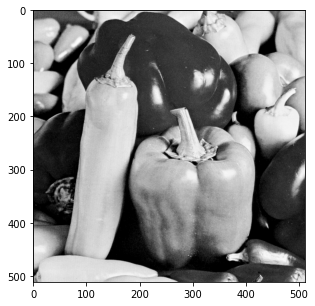

True

In [39]:
green_image_1 = image_1[:, :, 1]

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(green_image_1, cmap='gray')
plt.show()

cv.imwrite("output/ps0-2-b-1.png", green_image_1)

### c) Create a monochrome image (img1_red) by selecting the red channel of image 1
Output: ps0-2-c-1.png

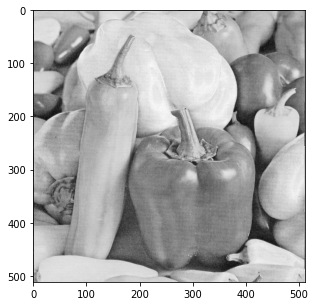

True

In [40]:
red_image = image_1[:, :, 0]

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(red_image, cmap='gray')
plt.show()

cv.imwrite("output/ps0-2-c-1.png", red_image)

### d) Which looks more like what you’d expect a monochrome image to look like? Would you expect a computer vision algorithm to work on one better than the other?
The green channel looks better, because there is a clear difference between pepper and tomato. When we use the
red channel, this difference is no longer that clear.

## Question 3 - Replacement of pixels
(Note: For this, use the better channel from 2-b/2-c as monochrome versions.)

### Take the inner center square region of 100x100 pixels of monochrome version of image 1 and insert them into the center of monochrome version of image 2
Output: Store the new image created as ps0-3-a-1.png

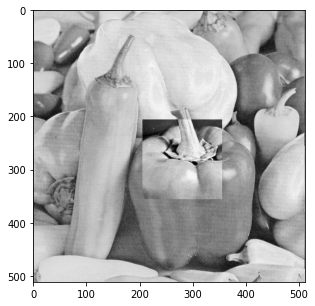

True

In [41]:
image_1_copy = image_1.copy()
green_image_1 = image_1_copy[:, :, 1]

origin_y = int(image_1_copy.shape[0]/2) - 50
origin_x = int(image_1_copy.shape[1]/2) - 50

red_image_1 = image_1_copy[:, :, 0]

green_image_1_center_box = green_image_1[origin_x:origin_x+150, origin_y:origin_y+150]
red_image_1[origin_x:origin_x+150, origin_y:origin_y+150] = green_image_1_center_box

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(red_image_1, cmap='gray')
plt.show()

cv.imwrite("output/ps0-3-a-1.png", red_image_1)

## Question 4 - Arithmetic and Geometric operations

### a) What is the min and max of the pixel values of img1_green? What is the mean? What is the standard deviation? And how did you compute these?
    Output: Text response, with code snippets

    R.: All of them are built-in methods on numpy
    Min: 0
    Max: 237
    Mean: 115.56825637817383
    Standard Deviation: 75.04609404809113

In [42]:
green_image_1 = image_1[:, :, 1]

print("Min: {}".format(green_image_1.min()))
print("Max: {}".format(green_image_1.max()))
print("Mean: {}".format(green_image_1.mean()))
print("Standard Deviation: {}".format(green_image_1.std()))


Min: 0
Max: 237
Mean: 115.56825637817383
Standard Deviation: 75.04609404809113


### b) Subtract the mean from all pixels, then divide by standard deviation, then multiply by 10 (if your image is 0 to 255) or by 0.05 (if your image ranges from 0.0 to 1.0). Now add the mean back in.
   Output: ps0-4-b-1.png

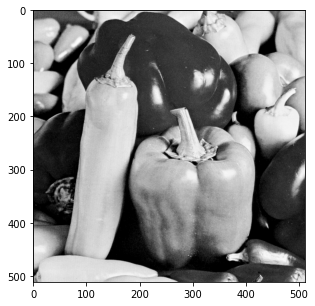

True

In [43]:
green_image_1 = image_1[:, :, 1]
green_image_1 = ((green_image_1 - green_image_1.mean())/ green_image_1.std())*10 + green_image_1.mean()

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(green_image_1, cmap='gray')
plt.show()

cv.imwrite("output/ps0-4-b-1.png", green_image_1)

### c) Shift img1_green to the left by 2 pixels.
   Output: ps0-4-c-1.png

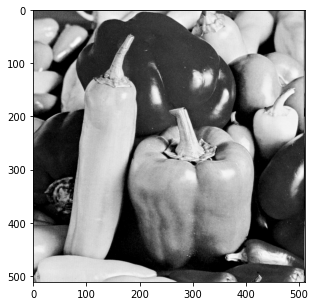

True

In [44]:
# green_image_1 = image_1[:, :, 1]

green_image_1_shifted = np.roll(green_image_1, -2)

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(green_image_1_shifted, cmap='gray')
plt.show()

cv.imwrite("output/ps0-4-c-1.png", green_image_1_shifted)

### d) Subtract the shifted version of img1_green from the original, and save the difference image.
   Output: ps0-4-d-1.png (make sure that the values are legal when you write the image so that you can see all
   relative differences), text response: What do negative pixel values mean anyways? <br>
   R.: As we use 8-bits images (pixel is represented as 0 to 255), when we have a negative pixels it is converted to zero.

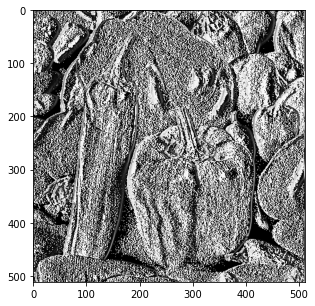

True

In [45]:
green_image_1 = image_1[:, :, 1]

green_image_1_shifted = np.roll(green_image_1, -2)

green_image_1_shifted = green_image_1 - green_image_1_shifted

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(green_image_1_shifted, cmap='gray')
plt.show()

cv.imwrite("output/ps0-4-d-1.png", green_image_1_shifted)

## 5.  Noise
### a) Take the original colored image (image 1) and start adding Gaussian noise to the pixels in the green channel. Increase sigma until the noise is somewhat visible.
Output: ps0-5-a-1.png, text response: What is the value of sigma you had to use? <br>
R.: Sigma = 20

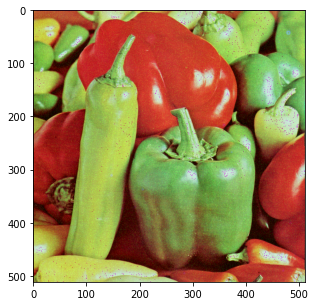

True

In [46]:
original_image_1 = image_1.copy()

# Creating noise array
height, width, depth = original_image_1.shape
noise = np.zeros((height,width), dtype=np.uint8)

# Fills the array with normally distributed random numbers.
cv.randn(noise, mean=0, stddev=20)

# Add noise to green channel of image 1
original_image_1[:, :, 1] = original_image_1[:, :, 1] + noise

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(original_image_1)
plt.show()

cv.imwrite("output/ps0-5-a-1.png", cv.cvtColor(original_image_1, cv.COLOR_RGB2BGR))

### b) Now, instead add that amount of noise to the blue channel.
Output: ps0-5-b-1.png

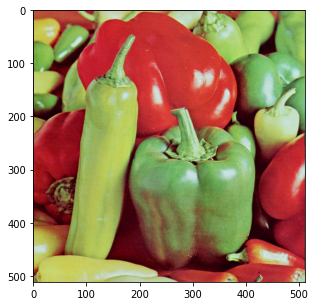

True

In [47]:
original_image_1 = image_1.copy()

# Creating noise array
height, width, depth = original_image_1.shape
noise = np.zeros((height,width), dtype=np.uint8)

# Fills the array with normally distributed random numbers.
cv.randn(noise, mean=0, stddev=20)

# Add noise to blue channel of image 1
original_image_1[:, :, 2] = original_image_1[:, :, 2] + noise

fig, axs = plt.subplots(figsize=(5, 5), facecolor="white")
axs.imshow(original_image_1)
plt.show()

cv.imwrite("output/ps0-5-b-1.png", cv.cvtColor(original_image_1, cv.COLOR_RGB2BGR))

### c) Which looks better? Why?
Output: Text response <br>
R.: After we applied the same gaussian noise to green and blue channels, we realized that the blue channel is more robust
to the addition of noise than green channel. There is no visible noise on blue channel.
The green channel is more important to our eyes than blue channel.